In [1]:
import pandas as pd
df = pd.read_csv('students.csv')
df

,Student_ID,Name,Age,Gender,Class_Participation,Homework_Completion_Rate,Average_Quiz_Scores,Average_Assignment_Scores,Average_Exam_Scores,Study_Hours_per_Week,Attendance_Percentage,Learning_Style,Group_Work,Overall_Grade
0,S001,Gaurav,18,Male,10,80,95,83,82,11.5,83,Kinesthetic,8,2.25
1,S002,Krishna,20,Female,6,72,96,87,46,7.4,85,Auditory,1,3.52
2,S003,Krishna,24,Female,6,91,57,66,50,14.9,91,Reading/Writing,4,3.70
3,S004,Aanya,24,Male,4,71,70,98,62,4.6,80,Visual,4,2.07
4,S005,Rahul,18,Female,10,93,60,100,64,13.1,98,Visual,8,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,S246,Meera,22,Female,9,65,60,90,74,5.9,98,Kinesthetic,4,2.45
246,S247,Ayaan,24,Male,6,88,97,85,93,15.5,60,Auditory,4,3.63
247,S248,Aarav,18,Female,6,70,59,56,86,8.3,66,Auditory,1,2.37
248,S249,Saanvi,21,Female,2,100,54,84,92,7.7,75,Visual,1,3.64


In [2]:
print(df.isnull().sum())

Student_ID                   0
Name                         0
Age                          0
Gender                       0
Class_Participation          0
Homework_Completion_Rate     0
Average_Quiz_Scores          0
Average_Assignment_Scores    0
Average_Exam_Scores          0
Study_Hours_per_Week         0
Attendance_Percentage        0
Learning_Style               0
Group_Work                   0
Overall_Grade                0
dtype: int64


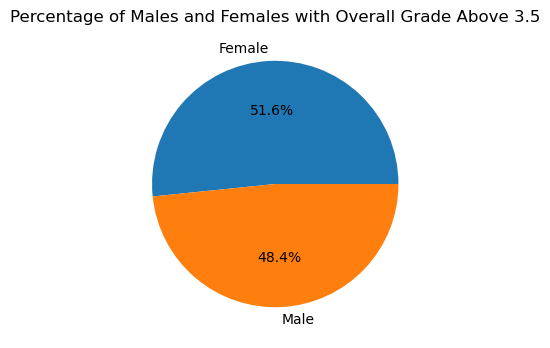

In [17]:
import matplotlib.pyplot as plt
above_average = df[df['Overall_Grade'] > 3.5]
gender_counts = above_average['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Males and Females with Overall Grade Above 3.5')
plt.show()

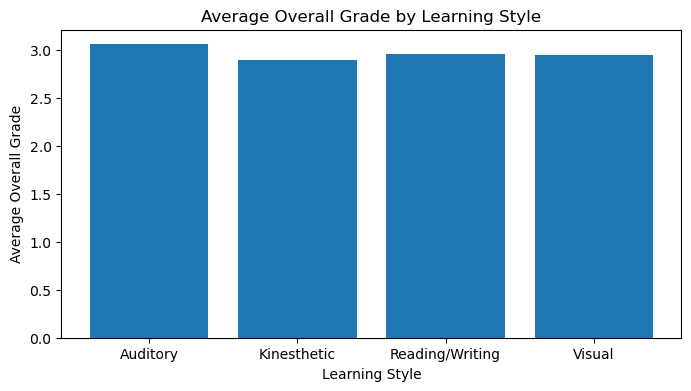

In [19]:
learning_style_avg_grade = df.groupby('Learning_Style')['Overall_Grade'].mean()
plt.figure(figsize=(8, 4))
plt.bar(learning_style_avg_grade.index, learning_style_avg_grade.values)
plt.xlabel('Learning Style')
plt.ylabel('Average Overall Grade')
plt.title('Average Overall Grade by Learning Style')
plt.show()

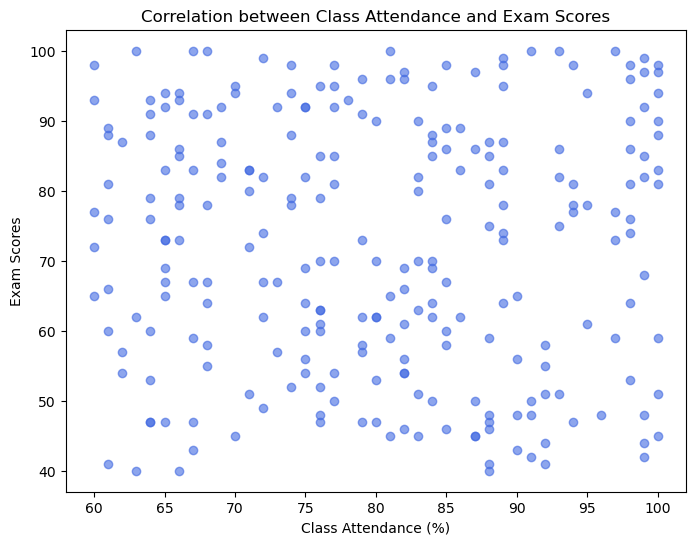

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Attendance_Percentage'], df['Average_Exam_Scores'])
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Scores')
plt.title('Correlation between Class Attendance and Exam Scores')
plt.show()

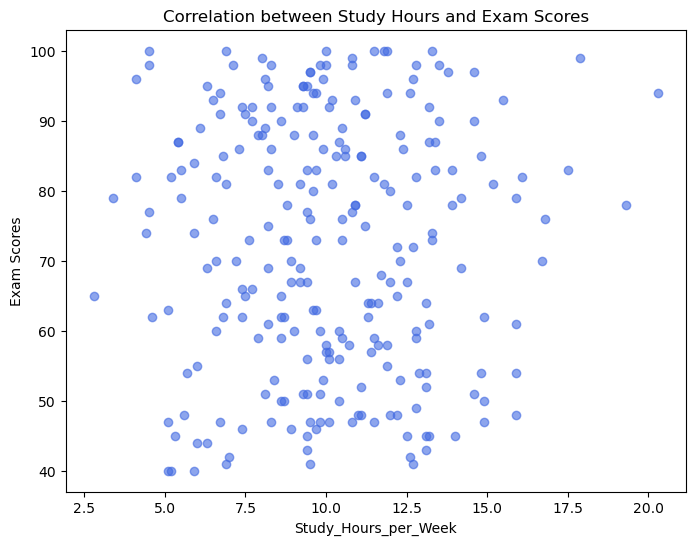

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Study_Hours_per_Week'], df['Average_Exam_Scores'], color='royalblue', alpha=0.6)
plt.xlabel('Study_Hours_per_Week')
plt.ylabel('Exam Scores')
plt.title('Correlation between Study Hours and Exam Scores')
plt.show()

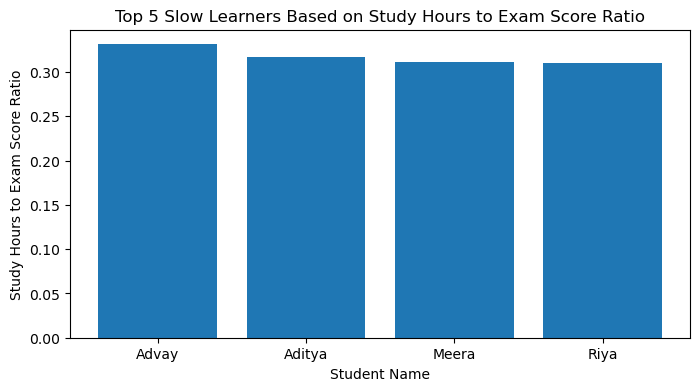

In [27]:
df['Study_to_Exam_Ratio'] = df['Study_Hours_per_Week'] / df['Average_Exam_Scores']
slow_learners = df.nlargest(5, 'Study_to_Exam_Ratio')
plt.figure(figsize=(8, 4))
plt.bar(slow_learners['Name'], slow_learners['Study_to_Exam_Ratio'])
plt.xlabel('Student Name')
plt.ylabel('Study Hours to Exam Score Ratio')
plt.title('Top 5 Slow Learners Based on Study Hours to Exam Score Ratio')
plt.show()

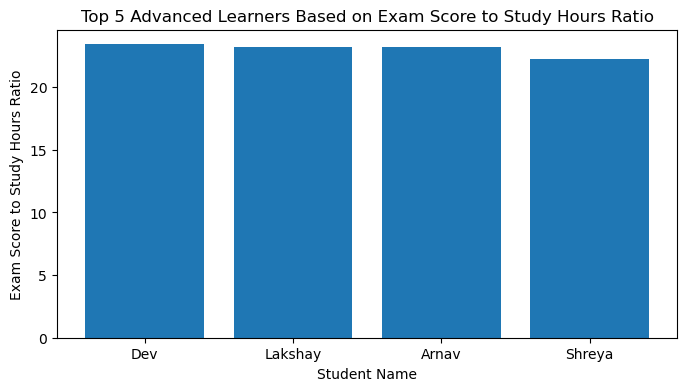

In [28]:
df['Exam_to_Study_Ratio'] = df['Average_Exam_Scores'] / df['Study_Hours_per_Week']
advanced_learners = df.nlargest(5, 'Exam_to_Study_Ratio')
plt.figure(figsize=(8, 4))
plt.bar(advanced_learners['Name'], advanced_learners['Exam_to_Study_Ratio'])
plt.xlabel('Student Name')
plt.ylabel('Exam Score to Study Hours Ratio')
plt.title('Top 5 Advanced Learners Based on Exam Score to Study Hours Ratio')
plt.show()